In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn
import mapclassify
import matplotlib
import matplotlib.pyplot as plt
import pysal

In [4]:
rv_df = gpd.read_file('../data/rvcenter_4km1k.shp')
rv_df.head()

,labels,n_asian_un,n_black_un,n_hispanic,n_native_u,n_white_un,n_persons_,n_asian_ov,n_black_ov,n_hispan_1,...,p_nonhis_1,p_white__1,p_black__1,p_hispan_3,p_native_1,p_asian__1,p_disabled,node_ids,emp,geometry
0,0,178.0,719.0,9046.0,64.0,2251.0,15585.0,0.0,0.0,0.0,...,358.020119,0.0,0.0,0.0,0.0,0.0,0.0,45988576639,228914.626149,"POLYGON ((-117.42426 33.93301, -117.41685 33.9..."
1,1,112.0,14.0,965.0,0.0,750.0,2286.0,0.0,0.0,0.0,...,48.422392,0.0,0.0,0.0,0.0,0.0,0.0,1003322712,11557.042032,"POLYGON ((-117.16262 33.52260, -117.16012 33.5..."
2,2,180.0,296.0,1488.0,0.0,371.0,3094.0,0.0,0.0,0.0,...,62.590665,0.0,0.0,0.0,0.0,0.0,0.0,151620780,22510.001451,"POLYGON ((-117.17386 34.05897, -117.17383 34.0..."
3,3,75.0,66.0,2407.0,28.0,350.0,3694.0,0.0,0.0,0.0,...,75.303555,0.0,0.0,0.0,0.0,0.0,0.0,6252732647,35417.084029,"POLYGON ((-117.71518 33.99044, -117.71511 33.9..."
4,4,522.0,470.0,5005.0,111.0,809.0,8852.0,0.0,0.0,0.0,...,199.178872,0.0,0.0,0.0,0.0,0.0,0.0,27482507725,79940.761948,"POLYGON ((-117.67014 34.08738, -117.67012 34.0..."


In [7]:
rv_df.shape

(9, 196)

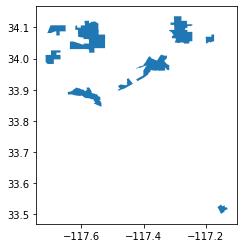

In [8]:
rv_df.plot()

In [ ]:
shp = ps.examples.get_path('columbus.shp')
db = gpd.read_file(shp)
db.head()

In [9]:
rv_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
rv_df.columns
cols = rv_df.columns.tolist()

In [15]:
print(cols)

['labels', 'n_asian_un', 'n_black_un', 'n_hispanic', 'n_native_u', 'n_white_un', 'n_persons_', 'n_asian_ov', 'n_black_ov', 'n_hispan_1', 'n_native_o', 'n_person_1', 'n_white_ov', 'n_asian__1', 'n_black__1', 'n_hispan_2', 'n_native_1', 'n_white__1', 'n_person_2', 'n_person_3', 'n_civilian', 'n_civili_1', 'n_person_4', 'n_age_5_ol', 'n_asian_ag', 'n_black_ag', 'n_hispan_3', 'n_native_a', 'n_white_ag', 'n_asian_pe', 'n_black_pe', 'n_chinese_', 'n_labor_fo', 'n_civili_2', 'n_edu_coll', 'n_cuban_po', 'n_poverty_', 'n_povert_1', 'n_total_po', 'n_female_o', 'n_povert_2', 'n_povert_3', 'n_disabled', 'n_housing_', 'n_povert_4', 'n_povert_5', 'n_povert_6', 'n_employed', 'n_total_fa', 'n_foreign_', 'n_female_h', 'n_filipino', 'n_female_l', 'n_german_p', 'n_german_b', 'n_househol', 'n_structur', 'n_hawaiian', 'n_total_ho', 'n_asian_ho', 'n_black_ho', 'n_hispan_4', 'n_white_ho', 'median_hou', 'median_inc', 'median_i_1', 'median_i_2', 'median_i_3', 'n_hispan_5', 'n_edu_hs_l', 'n_total__1', 'per_capi

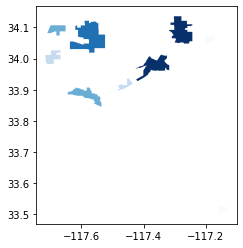

In [16]:
rv_df.plot(column='emp', scheme='fisher_jenks', cmap=plt.matplotlib.cm.Blues)
#plt.show()
#plt.savefig(fname='inc.png')

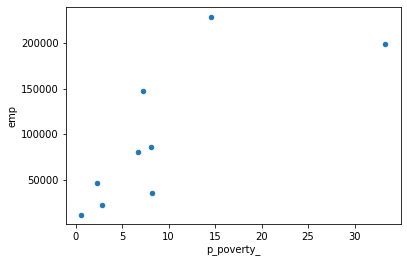

In [22]:
rv_df[['p_poverty_', 'emp']]\
  .plot.scatter('p_poverty_', 
                'emp')

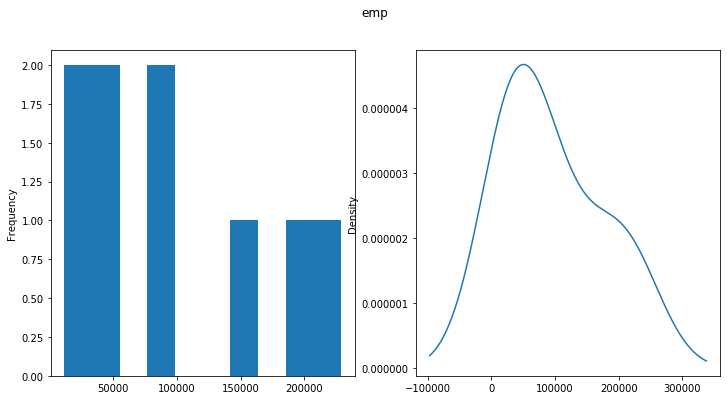

In [23]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# First axis
rv_df['emp'].plot.hist(ax=axs[0])
# Second axis
rv_df['emp'].plot.kde(ax=axs[1])
# Title
f.suptitle("emp")
# Display
plt.show()

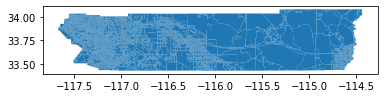

In [24]:
block_df = gpd.read_file('../data/route/tl_2017_06_tabblock10.shp')
block_df.head()
riverside_blocks = block_df[block_df['GEOID10'].str.match("^06065")]
riverside_blocks.plot()

In [33]:
rv1_df = rv_df.to_crs(riverside_blocks.crs)
joined = gpd.sjoin(rv1_df, riverside_blocks, how="inner", op='intersects')

In [34]:
joined.head()

,labels,n_asian_un,n_black_un,n_hispanic,n_native_u,n_white_un,n_persons_,n_asian_ov,n_black_ov,n_hispan_1,...,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
0,0,178.0,719.0,9046.0,64.0,2251.0,15585.0,0.0,0.0,0.0,...,Block 1041,G5040,U,75340,U,S,483544,0,+34.0078304,-117.3863886
0,0,178.0,719.0,9046.0,64.0,2251.0,15585.0,0.0,0.0,0.0,...,Block 4045,G5040,U,75340,U,S,7029,0,+34.0122112,-117.3432606
0,0,178.0,719.0,9046.0,64.0,2251.0,15585.0,0.0,0.0,0.0,...,Block 3010,G5040,U,75340,U,S,11414,0,+34.0142465,-117.3436778
0,0,178.0,719.0,9046.0,64.0,2251.0,15585.0,0.0,0.0,0.0,...,Block 2028,G5040,U,75340,U,S,209851,0,+34.0030057,-117.3370401
0,0,178.0,719.0,9046.0,64.0,2251.0,15585.0,0.0,0.0,0.0,...,Block 2029,G5040,U,75340,U,S,156108,0,+34.0028138,-117.3420556


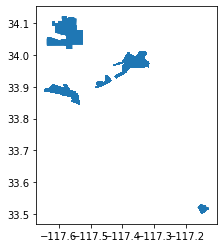

In [35]:
joined.plot()

In [36]:
joined.shape

(1755, 212)